In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

#################################
import time
import os
import logging
import pandas as pd
import wandb
import tensorflow as tf

logging.getLogger("wandb").setLevel(logging.ERROR)
os.environ['WANDB_SILENT'] = 'true'
os.environ['WANDB_CONSOLE'] = 'off'

import sys
sys.path.insert(0, '..')
from utils.reinforcementLearningHelper import *

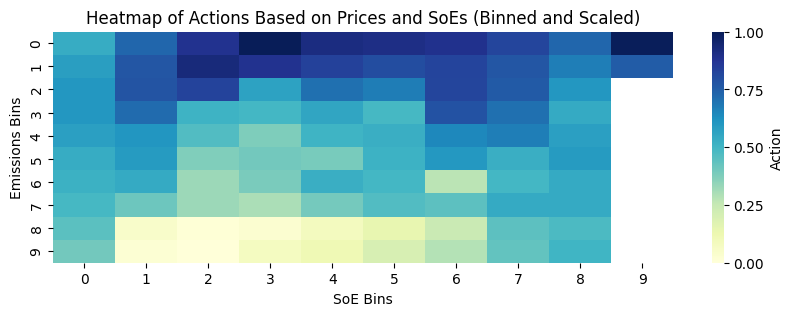

In [133]:
# Assuming df is already defined

# Scale 'prices' and 'soes' columns to the range [0, 1]
scaler = MinMaxScaler()
df[['emissions', 'soes']] = scaler.fit_transform(df[['emissions', 'soes']])

# Define the number of bins
num_bins = 10

# Discretize the 'prices' and 'soes' into bins
df['emission_bins'] = pd.cut(df['emissions'], bins=num_bins, labels=False)
df['soe_bins'] = pd.cut(df['soes'], bins=num_bins, labels=False)

# Aggregate the data to handle duplicates within bins, using only numeric columns
aggregated_df = df.groupby(['emission_bins', 'soe_bins'])['Action'].mean().reset_index()

# Normalize the 'Action' values to the range [0, 1]
action_scaler = MinMaxScaler()
aggregated_df['Action'] = action_scaler.fit_transform(aggregated_df[['Action']])

# Create a pivot table to structure the data for the heatmap
pivot_table = aggregated_df.pivot(index="emission_bins", columns="soe_bins", values="Action")

# Create the heatmap
plt.figure(figsize=(10, 3))
sns.heatmap(pivot_table, cmap="YlGnBu", cbar_kws={'label': 'Action', 'ticks': [0, 0.25, 0.5, 0.75, 1.0]})

plt.title("Heatmap of Actions Based on Prices and SoEs (Binned and Scaled)")
plt.xlabel("SoE Bins")
plt.ylabel("Emissions Bins")
plt.show()

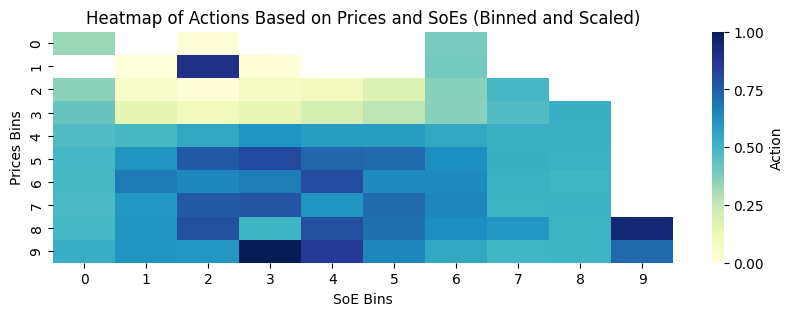

In [134]:
# Assuming df is already defined

# Scale 'prices' and 'soes' columns to the range [0, 1]
scaler = MinMaxScaler()
df[['prices', 'soes']] = scaler.fit_transform(df[['prices', 'soes']])

# Define the number of bins
num_bins = 10

# Discretize the 'prices' and 'soes' into bins
df['price_bins'] = pd.cut(df['prices'], bins=num_bins, labels=False)
df['soe_bins'] = pd.cut(df['soes'], bins=num_bins, labels=False)

# Aggregate the data to handle duplicates within bins, using only numeric columns
aggregated_df = df.groupby(['price_bins', 'soe_bins'])['Action'].mean().reset_index()

# Normalize the 'Action' values to the range [0, 1]
action_scaler = MinMaxScaler()
aggregated_df['Action'] = action_scaler.fit_transform(aggregated_df[['Action']])

# Create a pivot table to structure the data for the heatmap
pivot_table = aggregated_df.pivot(index="price_bins", columns="soe_bins", values="Action")

# Create the heatmap
plt.figure(figsize=(10, 3))
sns.heatmap(pivot_table, cmap="YlGnBu", cbar_kws={'label': 'Action', 'ticks': [0, 0.25, 0.5, 0.75, 1.0]})

plt.title("Heatmap of Actions Based on Prices and SoEs (Binned and Scaled)")
plt.xlabel("SoE Bins")
plt.ylabel("Prices Bins")
plt.show()